# Power Spectral Density

In [88]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def run_coin_toss_simulator(N, toss):
    count_heads=0
    random_signal=[]
    for i in range(N):
        result=random.choice(toss)
        if result==1:
            count_heads+=1
        random_signal.append(result)
    print(f"Number of Heads in iteration {j}: {count_heads}")
    return random_signal

In [85]:
M=500
N=32
toss=[1,-1]
random_signals=[]
PSDs=[]
for j in range(M):
    rsignal=run_coin_toss_simulator(N,toss)
    random_signals.append(rsignal)
    fhat=np.fft.rfft(rsignal,N)
    mag=np.abs(fhat)
    PSD=np.mean(mag*mag/N)
    PSDs.append(PSD)

(0.0, 6.0)

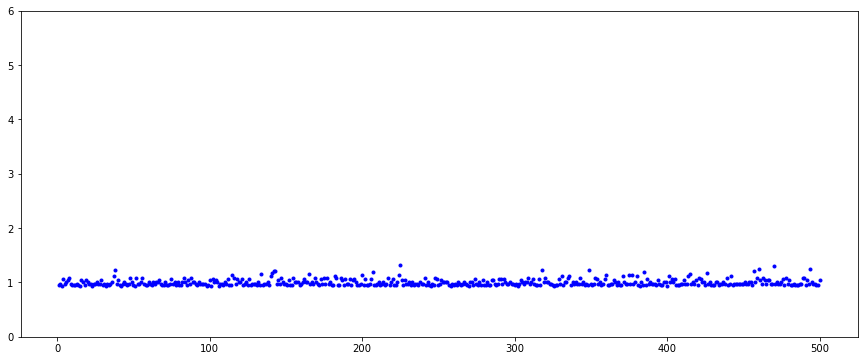

In [86]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,M+1), PSDs,'b.')
plt.ylim(0,6)

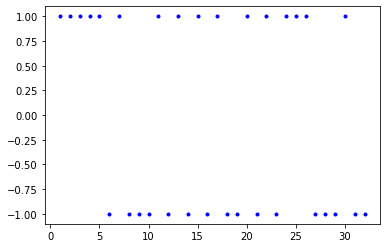

In [57]:
plt.figure()
plt.plot(np.arange(1,N+1),random_signal,'b.')

In [133]:
M=5000
N=32
toss=[1,-1]
ma_random_signals=[]
PSDs=[]

for j in range(M):
    rsignal=run_coin_toss_simulator(N,toss)
    ma_signal=pd.Series(rsignal).rolling(2).mean().tolist()[1:]
    ma_random_signals.append(ma_signal)
    
    fhat=np.fft.rfft(ma_signal,N)
    mag=np.abs(fhat)
    PSD=np.mean(mag*mag/N)
    PSDs.append(PSD)

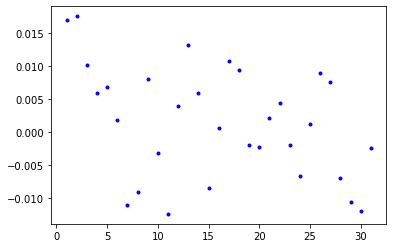

In [134]:
plt.figure()
plt.plot(np.arange(1,N),np.mean(ma_random_signals,axis=0),'b.')

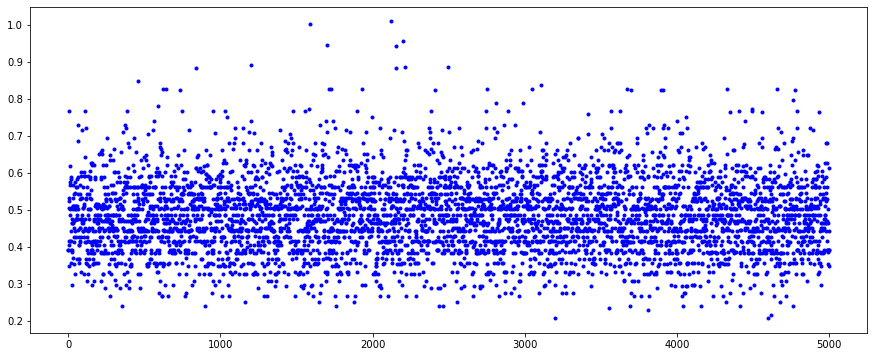

In [135]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(1,M+1), PSDs,'b.')
#plt.ylim(0,6)